In [ ]:
# Analysis wheter or not the numerical solvers will converge toward the origin when μ<1 

In [6]:
using Plots
using LinearAlgebra
using DifferentialEquations
using Random

In [4]:
include("euler_method.jl")
include("DTM.jl")
include("lorentz_system.jl")
include("RK4.jl")

RK4 (generic function with 1 method)

In [3]:
## parameter values
θ = 10.0; β = 8/3; μ = 1/2 # μ<1
tim = 20
Δt = 0.001

# initial values
x₀ = -15; y₀ = -17; z₀ = 35
x̄₀ = [x₀;
      y₀;
      z₀]

3-element Vector{Int64}:
 -15
 -17
  35

In [4]:
# Runga-Kutta 4
function RungeKutta4(Δt_RK, tim, x̄₀, p)
    tsteps_RK = Int(tim/Δt_RK)
    x̄=x̄₀
    XRK = zeros(3,tsteps_RK)
    for i=1:tsteps_RK
        x̄=RK4(LorentzSystem,p,x̄,Δt_RK)
        XRK[:,i] = x̄
    end
    return XRK
end

RungeKutta4 (generic function with 1 method)

In [5]:
# intial positions
r = 1
nr_of_dots = 3
dots = zeros(3, nr_of_dots)
for i=1:nr_of_dots
    dot = rand(-1.0:0.001:1.0,(1,3))
    dot = r*dot./norm(dot)
    dots[:,i] = dot
end


UndefVarError: UndefVarError: norm not defined

In [84]:
print(dots)

[0.6176996411581092 -0.30424956226282107; -0.6532404720647899 0.7971174515349383; -0.43786303677030525 0.5215706781648362]

In [2]:
Δt_RK = 0.01
XRK_Gigantic = zeros(nr_of_dots,3,Int(tim/Δt_RK))
for i=1:nr_of_dots
    x̄₀ = dots[:,i]
    XRK_Gigantic[i,:,:] = RungeKutta4(Δt_RK, tim, x̄₀, [θ,μ,β])
end


UndefVarError: UndefVarError: tim not defined

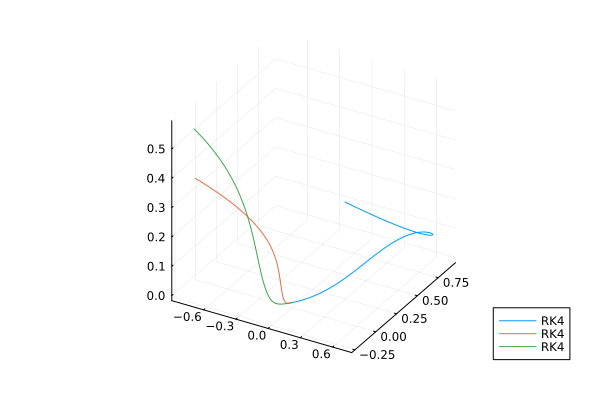

In [96]:
plot(XRK_Gigantic[1,1,:],XRK_Gigantic[1,2,:],XRK_Gigantic[1,3,:],label="RK4",legend=:bottomright)
plot!(XRK_Gigantic[2,1,:],XRK_Gigantic[2,2,:],XRK_Gigantic[2,3,:],label="RK4",legend=:bottomright)
plot!(XRK_Gigantic[3,1,:],XRK_Gigantic[3,2,:],XRK_Gigantic[3,3,:],label="RK4",legend=:bottomright)

In [1]:
plot(XRK_Gigantic[1,1,:],XRK_Gigantic[1,2,:],XRK_Gigantic[1,3,:],label="RK4",legend=:bottomright)
for i=2:nr_of_dots
    p = push!(XRK_Gigantic[i,1,:],XRK_Gigantic[i,2,:],XRK_Gigantic[i,3,:],label="RK4",legend=:bottomright)
end

UndefVarError: UndefVarError: XRK_Gigantic not defined

In [79]:
anim = @animate for i=1:Int(tim/Δt_RK)
    plot(XRK_Gigantic[:,1,i],XRK_Gigantic[:,2,i],XRK_Gigantic[:,3,i],label="RK4",legend=:bottomright)
end
gif(anim, "RK4.gif", fps = 15)

InterruptException: InterruptException:

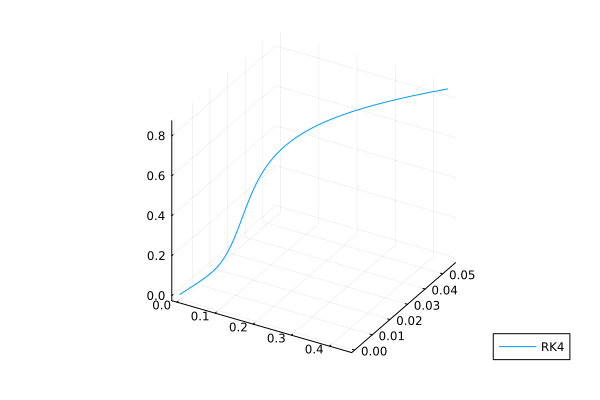

In [39]:
plot(XRK[1,:],XRK[2,:],XRK[3,:],label="RK4",legend=:bottomright)

In [11]:
#DTM
Δt_DTM = 0.0001
tsteps_DTM = Int(tim/Δt_DTM)
x̄=x̄₀
terms=20
XDTM = zeros(3,tsteps_DTM)
for i=1:tsteps_DTM
    x̄=DTM([θ,μ,β],x̄,terms, Δt_DTM)
    XDTM[:,i] = x̄
end
print(x̄)

[3.0436821493840754e-6, 2.8990883187979072e-6, 5.140532862109891e-12]